# Lab4 Introduction to Reinforcement Learning

## Lab Instruction

This lab, we will implement an Q-learning agent that will solve the GridWorld problem. The objective of your agent is to maximize the reward by find the shortest path to the exit without stepping on a bomb or a cliff. The result will be compare with the randomly move agent.

### Reinforcement Learning

The reinforcement learning components:</br>
<img src='https://github.com/thanatlap/CPE_CodeInAI_Course_2018/blob/master/9_RL/img/rl.png?raw=1' width=500>

- Reinforcement Learning Blog Post (Thai): <a href="https://medium.com/asquarelab/ep-1-reinforcement-learning-%E0%B9%80%E0%B8%9A%E0%B8%B7%E0%B9%89%E0%B8%AD%E0%B8%87%E0%B8%95%E0%B9%89%E0%B8%99-acfa9d42394c"> Thammasorn, A-Square</a></br>
- Reinforcement Learning Blog Post (Eng): <a href="http://adventuresinmachinelearning.com/reinforcement-learning-tutorial-python-keras/"> Adventures in Machine Learning</a>

### Temporal-Different Learning
**Temporal-difference (TD) learning** is a combination of **Monte Carlo** ideas and **dynamic programming (DP)** ideas.</br>
Like Monte Carlo methods, TD methods **can learn directly from raw experience without a model of the environment’s dynamics**.</br> 
Like DP, TD methods update estimates based in part on other learned estimates, **without waiting for a final outcome** (they bootstrap).</br>
The relationship between TD, DP, and Monte Carlo methods is a recurring theme in the theory of reinforcement learning

In [13]:
# Setup 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import env as env

### Environment - Cliff Gridworld

The environment is a Cliff Gridworld, illustrated as follows: </br>

<img src='https://github.com/thanatlap/CPE_CodeInAI_Course_2018/blob/master/9_RL/img/grid.png?raw=1' width=500></br>

The world is a 10x10 grid where the exit is at bottom right corner. The bomb is randomly generated around the exit.</br>
The agent is randomly start around the top left corner section. </br>
Each step count as -1. In other word, the more step your agent take, the more penalty you have.</br>
If your agent move against the corner, your agent will move. If your agent step to the cliff, the penalty is -20, same as stepping into a bomb which get -10 penalty.</br>
If your agent reach to the exit, you will recieve 20 reward.</br>

The episode is end when your agent found a way out and get a reward or step on a bomb and get the penalty point.</br>
Your agent is at the starting point when the new episode begin.

```env.World```</br>
>**Properties**
- height: The height of a grid world
- width: The width of a grid world
- current_location: current location of your agent.
- actions: a list of an available actions (up,down,left,right)</br>

>**Methods**
- ```available_actions()``` Get a set of available actions
- ```move_agent(action)``` Move an agent to the given direction and return a reward of that action.
- ```reset()``` Reset the state of the environment to the starting point.
- ```end_state()``` Get the end state. Return True if the state is end. False, otherwise.
- ```render()``` Show the current terran of the grid world

In [14]:
# Initialize environment
env = env.World()

In [15]:
env.available_actions()

['up', 'down', 'left', 'right']

### Define Random Agent

Define an agent that walk randomly.

In [16]:
# Define Random Agent Object
class DumbAgent():
    def action(self, available_actions):
        return np.random.choice(available_actions)

In [17]:
# Test your code
agent = DumbAgent()
agent.action([1,2,3,4])

3

###  Define a Q-Agent

Define an agent that used q-learning using the following pseudocode: </br>
<img src='https://github.com/thanatlap/CPE_CodeInAI_Course_2018/blob/master/9_RL/img/q_learning.png?raw=1'>

- S is a state of the environment
- S' is a next state
- A is a action choosen by the agent
- A' is a next action
- epsilon, alpha, gamma are the parameter for the agent

In [18]:
class Q_Agent():
    
    def __init__(self, environment, alpha, gamma, epsilon):
        self.environment = environment
        self.q_table = dict()
        for x in range(environment.height):
            for y in range(environment.width):
                self.q_table[(x,y)] = {'up':0,'down':0,'left':0,'right':0}
                
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        
        
    def action(self, available_actions):
        #
        # Code here
        #
        if np.random.uniform(0,1) < self.epsilon:
            # Exploration
            return np.random.choice(available_actions)
        else:
            # Exploitation
            S = self.q_table[self.environment.current_location]
            max_value = max(S.values())
            # random if you have multiple max value
            return np.random.choice([key for key, value in S.items() if value == max_value])
            
            
    def update(self, current_state, reward, next_state, actions):
        #
        # Code here
        #
        S_prime = self.q_table[next_state]
        max_value_S_prime = max(S_prime.values())
        current_Q_value = self.q_table[current_state][actions]
        
        # From the equation in pseudocode
        self.q_table[current_state][actions] = current_Q_value + self.alpha * (reward + self.gamma*max_value_S_prime - current_Q_value)

###  Deploy Your Agent

Create a function to run your agent in an environment. Your agent will run n trails, each trails has a maximum of m max_steps_per_episode.</br>
For the Q-agent, you have to update Q-value for your agent using following code: </br>
```python
if learn: 
    agent.update( ... )
```

The function must record the total reward in each trials and return when the function end.
```python
total_reward = run(env, agent, trials, max_steps_per_episode, learn=False)
```

In [19]:
def run(env, agent, trials, max_steps_per_episode, learn=False):
    
    total_reward = []
    for trial in range(trials):
        
        sum_reward = 0
        step = 0
        game_over = False
        while step < max_steps_per_episode and not game_over:
            
            # Code here
            # Sent the action to environment and get the next state 
            # and reward
            current_state = env.current_location
            action = agent.action(env.actions)
            reward = env.move_agent(action)
            next_state = env.current_location
            
            if learn:
                agent.update(current_state, reward, next_state, action)
            
            sum_reward += reward
            step += 1
            
            if env.end_state():
                env.reset()
                game_over = True
        
        total_reward.append(sum_reward)
    
    return total_reward

In [20]:
# Plot reward
def plot_total_reward(total_reward):
    plt.plot(total_reward)
    plt.title('The Sum of Reward During Each Episode')
    plt.xlabel('Episode')
    plt.ylabel('Cumulative Reward')

### Run a Dump Agent

In [21]:
## Run
env.reset()
agent = DumbAgent()
total_reward = run(env, agent, trials=500, max_steps_per_episode=1000, learn=False)

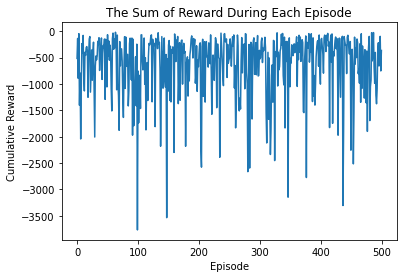

In [22]:
## Plot reward
plot_total_reward(total_reward)

### Run an Q-Agent

In [23]:
## Run
env.reset()
agent = Q_Agent(env, alpha=0.01, gamma=1, epsilon=0.05)
total_reward = run(env, agent, trials=500, max_steps_per_episode=1000, learn=True)

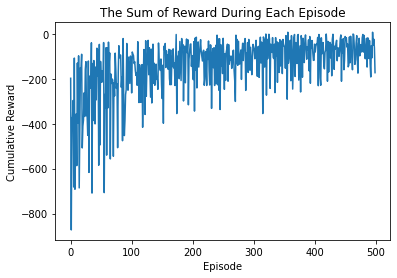

In [24]:
## Plot reward
plot_total_reward(total_reward)

### Show Q-Table

Show the agent's Q-table using to make a decision.

In [25]:
def Viz_q_table(d, indent=0):
    for key, value in d.items():
        print('\t' * indent + str(key))
        if isinstance(value, dict):
            Viz_q_table(value, indent+1)
        else:
            print('\t' * (indent+1) + str(value))

In [26]:
Viz_q_table(agent.q_table)

(0, 0)
	up
		-3.689278399052118
	down
		-3.6888030020024325
	left
		-3.6896005462932933
	right
		-3.6984886743991825
(0, 1)
	up
		-3.699341727240786
	down
		-3.7035708293991063
	left
		-3.700710978255126
	right
		-3.70815689944012
(0, 2)
	up
		-3.6791983067643184
	down
		-3.681216822785778
	left
		-3.6739690890552734
	right
		-3.6760710357031328
(0, 3)
	up
		-3.609609432038496
	down
		-3.6068017563743875
	left
		-3.612813329642156
	right
		-3.842721133710259
(0, 4)
	up
		-0.5987380917668416
	down
		-0.5993422962495771
	left
		-0.5048619363265338
	right
		-0.5980000000000001
(0, 5)
	up
		-0.2
	down
		-0.399250479900083
	left
		-0.4022214186789671
	right
		-0.398
(0, 6)
	up
		-0.398
	down
		-0.3992538550802986
	left
		-0.2
	right
		-0.4
(0, 7)
	up
		-0.2
	down
		-0.2
	left
		-0.20199999999999999
	right
		-0.39899518770172687
(0, 8)
	up
		-0.39918818697928554
	down
		-0.3994104919192704
	left
		-0.2
	right
		-0.2026253788726302
(0, 9)
	up
		-1.5296197343946683
	down
		-1.5394759228543584


### Try by me

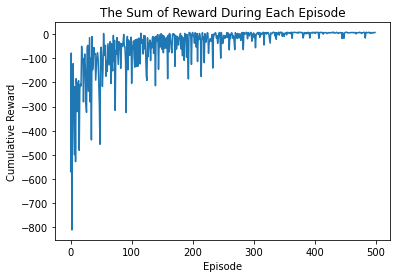

In [47]:
## change alpha 0.01 to 0.05
env.reset()
agent = Q_Agent(env, alpha=0.05, gamma=1, epsilon=0.05)
total_reward = run(env, agent, trials=500, max_steps_per_episode=1000, learn=True)
plot_total_reward(total_reward)

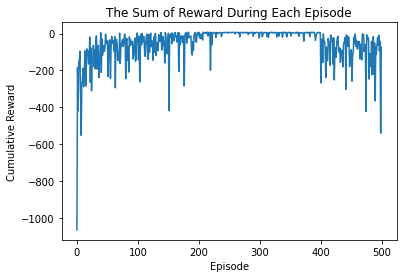

In [46]:
## change alpha 0.01 to 0.05 and epsilon=0.05 to 0.08
env.reset()
agent = Q_Agent(env, alpha=0.05, gamma=2, epsilon=0.08)
total_reward = run(env, agent, trials=500, max_steps_per_episode=1000, learn=True)
plot_total_reward(total_reward)

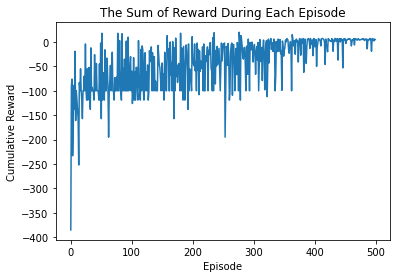

In [44]:
## change alpha 0.01 to 0.05 and max_steps_per_episode 1000 to 100
env.reset()
agent = Q_Agent(env, alpha=0.05, gamma=1, epsilon=0.05)
total_reward = run(env, agent, trials=500, max_steps_per_episode=100, learn=True)
plot_total_reward(total_reward)

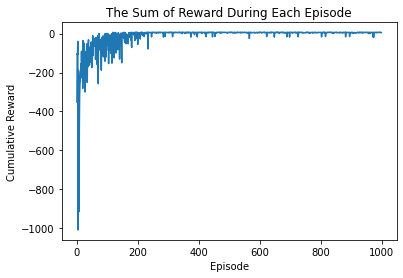

In [62]:
## change alpha 0.01 to 0.08 and epsilon=0.05 to 0.03
env.reset()
agent = Q_Agent(env, alpha=0.08, gamma=1, epsilon=0.03)
total_reward = run(env, agent, trials=1000, max_steps_per_episode=1000, learn=True)
plot_total_reward(total_reward)